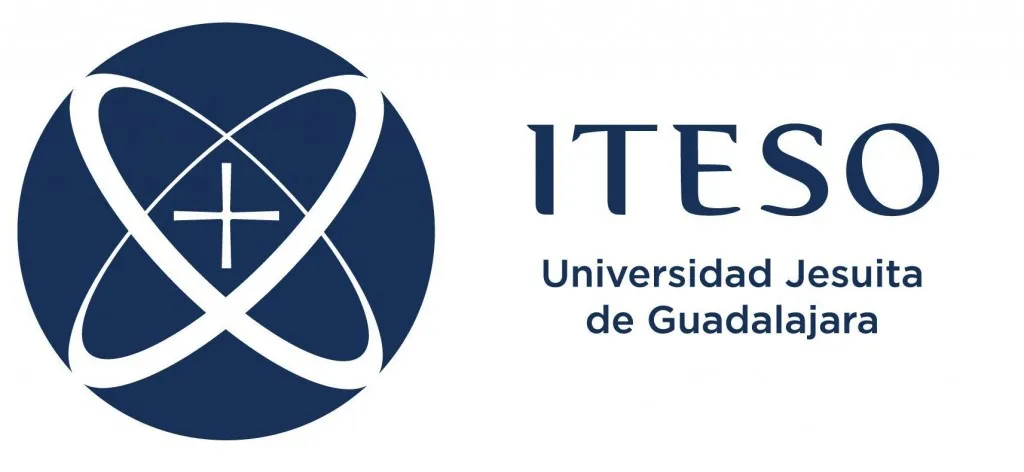

<center><font color=#555555><font size=6> MAF1731 - Microstructure and Trading Systems </font> <br> <br>
    
<center><font color=#555555><font size=5> B.Eng Financial Engineering </font> <br> <br> <br> <br>
   
<center> <font color= #555555> <font size = Feb 2023 </a>  <font color= #555555> <font size = 4> Repository: <a href='https://github.com/JP-GZ/Lab_5_MYST'>Link</a></font>

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> Proyecto Final </font> <br> <br> <font color= #555555> <font size = 5> Análisis Técnico  </font>

<hr style="border:0.02in solid gray"> </hr>

<font color= #6B6B6B> <font size = 2> **<center> Juan Pablo García Zaragoza**

<font color= #6B6B6B> <font size = 2> **<center> Ana María Aguilera Gómez**
    
<font color= #6B6B6B> <font size = 2> **<center> Aniel Esthefanía Villanueva**

<font color= #6B6B6B> <font size = 2> **<center> Eduardo Loza de la Torre**
    

<br>

# <font color= #6B6B6B> <font size = 6> 1. Introduction </font>

<hr style="border:0.02in solid gray"> </hr>

El análisis técnico es una herramienta fundamental para los inversores que buscan tomar decisiones informadas en sus operaciones financieras. Consiste en analizar el comportamiento y movimiento de los precios de un activo financiero con el objetivo de predecir su comportamiento.

En este proyecto se realizará un sistema de trading financiero utilizando el análisis técnico con los datos del par de divisas EURUSD, utilizando indicadores técnicos y criterios para identificar señales de entrada y salida del mercado para lograr la maximización de rentabilidad.

Se definirán los aspectos financieros, estadísticos y computacionales para desarrollar el proyecto.

<br>

# <font color= #6B6B6B> 2. Install/Load Packages and Depedencies </font>

<hr style="border:0.02in solid gray"> </hr>

## <font color= #6B6B6B> 2.1 Python Packages </font> <font color= #555555>

In order to run this notebook, it is necessary to have installed and/or have the _requirements.txt_ file with the following: 

- pandas>=1.1.1 
- numpy>=1.19.1
- jupyter>=1.0.0

## <font color= #6B6B6B> 2.2 Files Dependencies </font> <font color= #555555>

The following are the file dependencies that are needed to run this notebook:

- files/precios.csv : Precios históricos
- files/datos.txt : Otros datos históricos

## <font color= #6E6E6E> 2.3 Install Packages</font>

In [1]:
%%capture

# Install all the pip packages in the requirements.txt
import sys
!{sys.executable} -m pip install -r requirements.txt

In [2]:
import warnings
warnings.filterwarnings("ignore")
from data import *
from functions import *
from visualizations import *

<br>

# <font color= #6B6B6B> 3. Data Description </font>

<hr style="border:0.02in solid gray"> </hr>

- Capital inicial: 100,000 
- Par de divisas: EURUSD 
- Riesgo máximo por operación (pérdida máximo): 1,000 USD
- División de los datos:  
    - Periodo de entrenamiento: 01/ene/2020 - 01/ene/2021
    - Periodo de prueba: 01/Feb/2021 - 01/Feb/2022

In [3]:
data_Test,data_Train = extraccion_data()
data_Train

time     open     high      low    close  tick_volume  spread  \
0    2020-01-02  1.12080  1.12140  1.11628  1.11712       486302      15   
1    2020-01-03  1.11712  1.11792  1.11243  1.11601       598129      13   
2    2020-01-06  1.11637  1.12049  1.11565  1.11958       554376      15   
3    2020-01-07  1.11957  1.11969  1.11329  1.11513       554991      14   
4    2020-01-08  1.11512  1.11675  1.11012  1.11046       739679      15   
..          ...      ...      ...      ...      ...          ...     ...   
255  2020-12-24  1.21834  1.22150  1.21766  1.21805       420206      13   
256  2020-12-28  1.21850  1.22498  1.21795  1.22154       638127      15   
257  2020-12-29  1.22154  1.22743  1.22062  1.22466       650766      15   
258  2020-12-30  1.22466  1.23092  1.22457  1.22935       659800      15   
259  2020-12-31  1.22935  1.23086  1.22142  1.22161       374748      13   

      real_volume  
0     67538850000  
1     89719350000  
2     83156400000  
3     83248650000  
4    110951850000  
..            ...  
255   63030900000  
256   95719050000  
257   97614900000  
258   98970000000  
259   56212200000  

[260 rows x 8 columns]

In [4]:
data_Test

time     open     high      low    close  tick_volume  spread  \
0    2021-01-04  1.22379  1.23091  1.22291  1.22456       564259      15   
1    2021-01-05  1.22456  1.23050  1.22437  1.22911       490800      15   
2    2021-01-06  1.22934  1.23487  1.22647  1.23228       688317      15   
3    2021-01-07  1.23228  1.23436  1.22443  1.22694       548643      15   
4    2021-01-08  1.22694  1.22839  1.21921  1.22173       601301      13   
..          ...      ...      ...      ...      ...          ...     ...   
255  2021-12-27  1.13056  1.13339  1.13022  1.13263       215290      14   
256  2021-12-28  1.13263  1.13326  1.12888  1.13073       226592      14   
257  2021-12-29  1.13066  1.13681  1.12729  1.13448       264626      14   
258  2021-12-30  1.13446  1.13592  1.12978  1.13138       289933      14   
259  2021-12-31  1.13138  1.13857  1.13025  1.13839       268167      13   

      real_volume  
0     84638850000  
1     73620000000  
2    103247550000  
3     82296450000  
4     90195150000  
..            ...  
255   32293500000  
256   33988800000  
257   39693900000  
258   43489950000  
259   40225050000  

[260 rows x 8 columns]

<br>

# <font color= #6B6B6B> 4. Aspectos Financieros  </font>

<hr style="border:0.02in solid gray"> </hr>

## <font color= #6B6B6B> 4.1 Definición del sistema de trading y 4 criterios </font> <font color= #555555>

**1. Estrategia de trading:**

Se utilizará una estrategia de trading basada en análisis técnico, en la que se busca identificar patrones y tendencias en los gráficos de precios para tomar decisiones de compra o venta. 

**2. Criterio de entrada:**

Para el criterio de entrada, se utilizarán las Bandas de Bollinger, el oscilador estocástico y el MACD para identificar señales de compra o venta. 

**3. Criterio de salida:**

El criterio de salida debe ser determinado por el nivel de riesgo máximo por operación, que en este caso es de 1,000 USD. 

**4. Gestión de riesgos:**

Se utiliza una combinación de stop loss y take profit para limitar la pérdida máxima y asegurar las ganancias.

#### Señal de compra con Bandas de Bollinger 

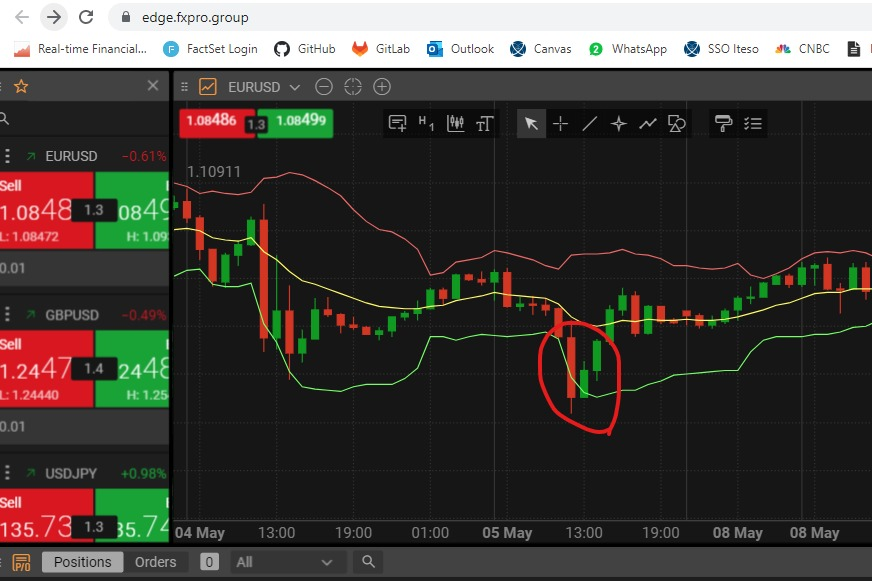

#### Señal de compra con Oscilador Estocástico 

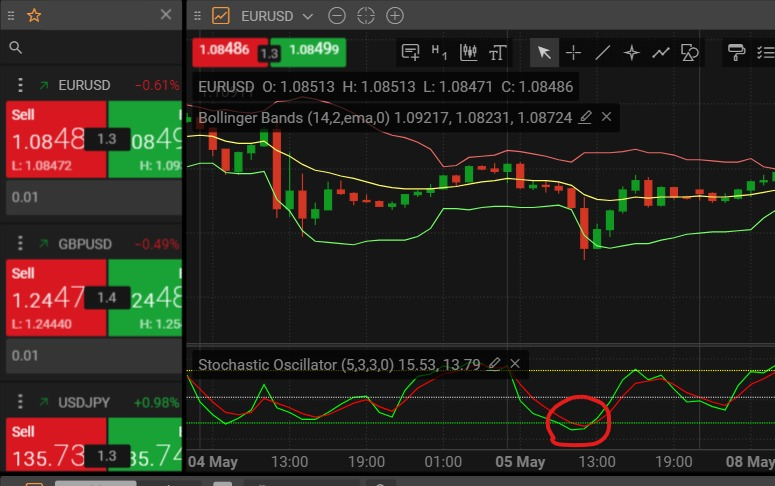

#### Señal de compra con MACD

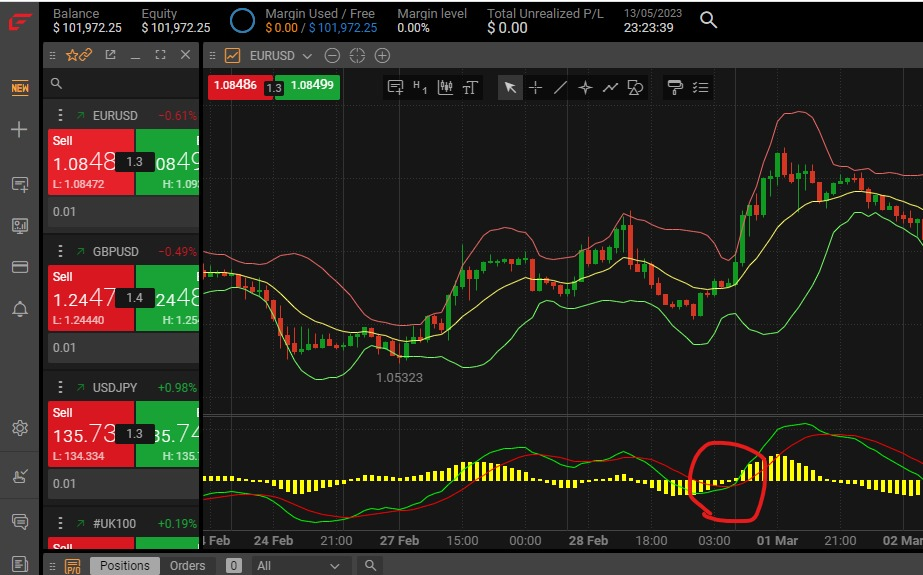

**Señal de venta con Oscilador Estocástico y Bandas Bollinger**

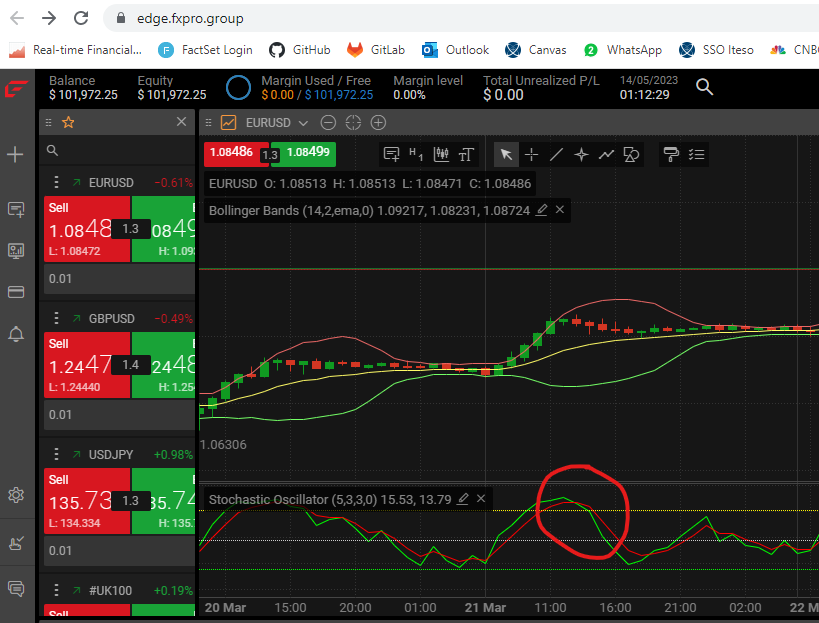

**Señal de venta con Bandas Bollinger**

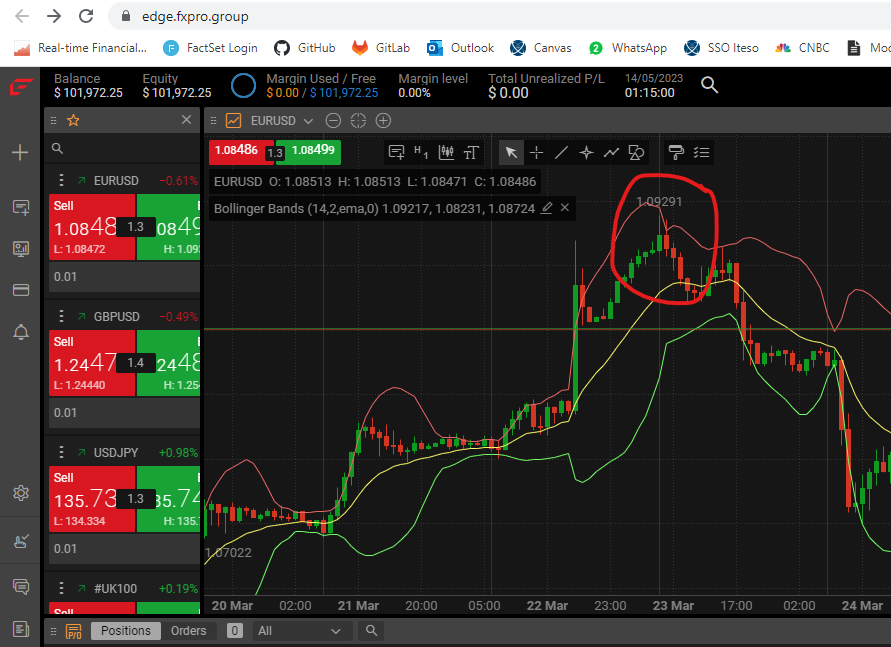

<br>

# <font color= #6B6B6B> 5. Aspectos Estadísticos  </font>

<hr style="border:0.02in solid gray"> </hr>

**Estudios Técnicos**: 

- Bandas Bollinger: Ayuda a identificar la volatilidad y la tendencia de un mercado financiero. Cuando la volatilidad es alta, las bandas se expanden, y cuando la volatilidad es baja, las bandas se contraen. Se compone de tres líneas que se dibujan en un gráfico de precios: La línea central es una media móvil simple, mientras que las otras dos líneas se dibujan por encima y por debajo de la línea central y representan el desviación estándar de los precios con respecto a la media móvil.

$$\text{BB}(t) = \text{MA}(t) + k*\text{SD}(t)$$

- Oscilador Estocástico: Mide la posición de un precio de cierre actual en relación con su rango de precios en un período de tiempo determinado.El oscilador estocástico se representa como una línea que oscila entre 0 y 100. Los valores por encima del 80 se consideran sobrecomprados, mientras que los valores por debajo del 20 se consideran sobrevendidos.

$$ \%K = ((C - L_n) / (H_n - L_n)) x 100$$

- MACD (Moving Average Convergence Divergence): Se compone de dos medias móviles exponenciales (EMA) que se restan entre sí, lo que permite a los traders y analistas identificar cambios en la tendencia y posibles oportunidades de compra o venta.

$$MACD = EMA(12) - EMA(26)$$

En el caso de este laboratorio la estrategia es que se abra o se cierre una posición si dos de estos indicadores concuerdan con sus señales.

## <font color= #6B6B6B> 5.1 Propuesta de algoritmo </font> <font color= #555555>

In [5]:
data_Train_tec = fun.technicals(data_Train).dropna()
data_Train_tec['time'] = pd.to_datetime(data_Train_tec['time'], format='%Y-%m-%d')
data_Train_tec

time     open     high      low    close  tick_volume  spread  \
33  2020-02-18  1.08342  1.08373  1.07848  1.07911       564307      15   
34  2020-02-19  1.07911  1.08110  1.07815  1.08039       546016      15   
35  2020-02-20  1.08037  1.08204  1.07772  1.07841       611934      15   
36  2020-02-21  1.07841  1.08628  1.07828  1.08468       605890      13   
37  2020-02-24  1.08240  1.08714  1.08043  1.08519       747020      15   
..         ...      ...      ...      ...      ...          ...     ...   
255 2020-12-24  1.21834  1.22150  1.21766  1.21805       420206      13   
256 2020-12-28  1.21850  1.22498  1.21795  1.22154       638127      15   
257 2020-12-29  1.22154  1.22743  1.22062  1.22466       650766      15   
258 2020-12-30  1.22466  1.23092  1.22457  1.22935       659800      15   
259 2020-12-31  1.22935  1.23086  1.22142  1.22161       374748      13   

      real_volume    bb_bbm    bb_bbh  ...  bb_high_signal  bb_low_signal  \
33    84646050000  1.097340  1.115853  ...             0.0            0.0   
34    81902400000  1.096019  1.115210  ...             0.0            0.0   
35    91790100000  1.094552  1.114189  ...             0.0            0.0   
36    90883500000  1.093568  1.113012  ...             0.0            0.0   
37   112053000000  1.092746  1.112078  ...             0.0            0.0   
..            ...       ...       ...  ...             ...            ...   
255   63030900000  1.212155  1.230787  ...             0.0            0.0   
256   95719050000  1.213600  1.230088  ...             0.0            0.0   
257   97614900000  1.214952  1.230140  ...             0.0            0.0   
258   98970000000  1.216700  1.229472  ...             0.0            0.0   
259   56212200000  1.217411  1.229517  ...             0.0            0.0   

     stochastic  stochastic_buy_signal  stochastic_sell_signal      macd  \
33     2.030293                   True                   False -0.007566   
34     7.142857                   True                   False -0.007769   
35     2.182163                   True                   False -0.007997   
36    24.318658                  False                   False -0.007585   
37    27.676917                  False                   False -0.007134   
..          ...                    ...                     ...       ...   
255   57.176251                  False                   False  0.007986   
256   73.492286                  False                   False  0.007782   
257   87.181860                  False                    True  0.007782   
258   93.436455                  False                    True  0.008067   
259   54.474328                  False                   False  0.007581   

     macd_signal  macd_hist  macd_buy_signal  macd_sell_hist  
33     -0.005923  -0.001643            False            True  
34     -0.006292  -0.001477            False            True  
35     -0.006633  -0.001364            False            True  
36     -0.006823  -0.000761            False            True  
37     -0.006885  -0.000249            False            True  
..           ...        ...              ...             ...  
255     0.008591  -0.000604            False           False  
256     0.008429  -0.000647            False           False  
257     0.008299  -0.000518            False           False  
258     0.008253  -0.000186            False           False  
259     0.008119  -0.000538            False           False  

[227 rows x 21 columns]

In [6]:
data_Test_tec = fun.technicals(data_Test).dropna()
data_Test_tec['time'] = pd.to_datetime(data_Test_tec['time'], format='%Y-%m-%d')
data_Test_tec

time     open     high      low    close  tick_volume  spread  \
33  2021-02-18  1.20344  1.20938  1.20344  1.20884       711696      15   
34  2021-02-19  1.20884  1.21437  1.20816  1.21181       721397      13   
35  2021-02-22  1.21135  1.21686  1.20905  1.21528       693352      15   
36  2021-02-23  1.21519  1.21792  1.21345  1.21486       280844      15   
37  2021-02-24  1.21485  1.21739  1.21082  1.21609       345829      15   
..         ...      ...      ...      ...      ...          ...     ...   
255 2021-12-27  1.13056  1.13339  1.13022  1.13263       215290      14   
256 2021-12-28  1.13263  1.13326  1.12888  1.13073       226592      14   
257 2021-12-29  1.13066  1.13681  1.12729  1.13448       264626      14   
258 2021-12-30  1.13446  1.13592  1.12978  1.13138       289933      14   
259 2021-12-31  1.13138  1.13857  1.13025  1.13839       268167      13   

      real_volume    bb_bbm    bb_bbh  ...  bb_high_signal  bb_low_signal  \
33   106754400000  1.209634  1.219969  ...             0.0            0.0   
34   108209550000  1.209429  1.219406  ...             0.0            0.0   
35   104002800000  1.209351  1.219117  ...             0.0            0.0   
36    42126600000  1.209400  1.219264  ...             0.0            0.0   
37    51874350000  1.209408  1.219294  ...             0.0            0.0   
..            ...       ...       ...  ...             ...            ...   
255   32293500000  1.129914  1.135355  ...             0.0            0.0   
256   33988800000  1.129996  1.135432  ...             0.0            0.0   
257   39693900000  1.130043  1.135615  ...             0.0            0.0   
258   43489950000  1.130021  1.135567  ...             0.0            0.0   
259   40225050000  1.130420  1.137012  ...             1.0            0.0   

     stochastic  stochastic_buy_signal  stochastic_sell_signal      macd  \
33    62.983425                  False                   False -0.002062   
34    76.657459                  False                   False -0.001691   
35    92.633517                  False                    True -0.001105   
36    86.555360                  False                    True -0.000666   
37    91.959578                  False                    True -0.000216   
..          ...                    ...                     ...       ...   
255   76.063446                  False                   False -0.001936   
256   62.364816                  False                   False -0.001765   
257   84.181942                  False                    True -0.001313   
258   63.136456                  False                   False -0.001190   
259   98.908429                  False                    True -0.000522   

     macd_signal  macd_hist  macd_buy_signal  macd_sell_hist  
33     -0.002737   0.000674             True            True  
34     -0.002528   0.000836             True            True  
35     -0.002243   0.001138             True            True  
36     -0.001928   0.001262             True            True  
37     -0.001585   0.001369             True            True  
..           ...        ...              ...             ...  
255    -0.003303   0.001367             True            True  
256    -0.002995   0.001230             True            True  
257    -0.002659   0.001346             True            True  
258    -0.002365   0.001175             True            True  
259    -0.001996   0.001475             True            True  

[227 rows x 21 columns]

In [7]:
plot_bollinger_bands(data_Train_tec)

In [8]:
graph_oscillator(data_Train_tec,"Oscillator")

En las gráficas se puede confirmar las señales de compra y de venta de cada indicador que concuerdan con los datos de arriba. 

<br>

# <font color= #6B6B6B> 6. Aspectos Computacionales  </font>

<hr style="border:0.02in solid gray"> </hr>

**Función de utilidad**: 

- La función de utilidad o función de objetivo es la maximización de las ganancias. 
- La medida de atribución al desempeño es el cash disponible en la cuenta.

**Parámetros a optimizar:**

- Parámetro: 1
    - Nombre: Volumen
    - Descripción: El volumen de unidades para abrir una operación.
    - Tipo de valor: numérico
    - Rango de valores: 5000 - 15000
    - Tamaño de paso mínimo: 1
    
- Parámetro: 2
    - Nombre: StopLoss
    - Descripción: El nivel de precio en el que se cerrará automáticamente una operación para limitar las pérdidas.
    - Tipo de valor: numérico
    - Rango de valores: 0.1 - 0.9
    - Tamaño de paso mínimo: 1
    
- Parámetro: 3
    - Nombre: TakeProfit
    - Descripción: El nivel de precio en el que se cerrará automáticamente una operación para asegurar las ganancias.
    - Tipo de valor: numérico
    - Rango de valores: 0.1 - 0.9
    - Tamaño de paso mínimo: 1
    
**Espacio de búsqueda**

- Parámetro 1 (Volumen): Rango de valores de 5,000 a 15,000
- Parámetro 2 (StopLoss): 9 valores posibles (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9)
- Parámetro 3 (TakeProfit): 9 valores posibles (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9)

Por lo tanto, el espacio de búsqueda total para este problema de optimización es: 

(15000 - 5000 + 1) x 9 x 9 = **6561** posibles combinaciones de valores de parámetros.

**Tiempo de búsqueda exhaustiva**

Tiempo total = tamaño del espacio de búsqueda * tiempo por búsqueda

6561 * 5 segundos = 32,805 segundos

Lo que equivale a 8.5 horas aproximadamente.

**Método de optimización**

- PSO (Optimización por Enjambre de Partículas): Utiliza una población de soluciones candidatas, representadas como partículas, que se mueven alrededor de un espacio de búsqueda para encontrar la mejor solución.
- Búsqueda exhaustiva: Evaluación sistemática de todas las posibles soluciones.

# <font color= #6B6B6B> <font size = 6> 7. Results </font>

<hr style="border:0.02in solid gray"> </hr>

## <font color= #6B6B6B> 7.1 Periodo de optimización </font>

### <font color= #6B6B6B> 7.1.1 Backtest data</font>

Se muestra el primer trading con los datos de entrenamiento:

In [9]:
traiding_train = fun.tradear(data_Train_tec,0.1, 0.1, 8000, visuales = True, optimizar=False)
print(f'Cash = {traiding_train[-1]:.4f}')

Vendiendo 8000 a 1.09992 - Cash 91189.6408
Vendiendo 8000 a 1.10262 - Cash 82357.6546
Vendiendo 8000 a 1.11327 - Cash 73440.36189999999
Vendiendo 8000 a 1.1171 - Cash 64492.39089999999
Vendiendo 8000 a 1.11339 - Cash 55574.13699999999
Vendiendo 8000 a 1.12371 - Cash 46573.21989999999
Vendiendo 8000 a 1.12846 - Cash 37534.25529999999
Vendiendo 8000 a 1.1446 - Cash 28366.00929999999
Comprando 8000 a 1.06619 - Cash 19825.82739999999
Comprando 8000 a 1.08382 - Cash 11144.429199999991
Cerrando por take profit 8000 a 1.1751 - Cash 20533.47819999999
Vendiendo 8000 a 1.1751 - Cash 11120.92719999999
Cerrando por take profit 8000 a 1.19306 - Cash 20653.476599999987
Comprando 8000 a 1.17067 - Cash 11276.409899999986
Cerrando por stop loss 8000 a 1.21125 - Cash 19175.243999999988
Vendiendo 8000 a 1.21125 - Cash 9473.131499999989
Cerrando por stop loss 8000 a 1.21422 - Cash 17391.381299999986
Vendiendo 8000 a 1.21422 - Cash 7665.479099999986
Cerrando por stop loss 8000 a 1.22661 - Cash 15654.919799

**Búsqueda exhaustiva:**

In [10]:
opt_vals = fun.busqueda_exhaustiva(data_Train_tec)
opt_vals

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:36<00:00,  7.85s/it]


stop_loss          0.142105
take_profit        0.184211
volumen         5000.000000
profit         97247.668250
Name: 440, dtype: float64

**PSO:**

In [11]:
best_cost, best_args = fun.busqueda_pso(data_Train_tec)
display(best_args) # Argumentos que salen 

2023-05-13 18:26:22,694 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|100/100, best_cost=-9.72e+4
2023-05-13 18:26:43,345 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -97242.96318195222, best pos: [8.45328909e-01 6.76509613e-01 5.00854742e+03]


array([8.45328909e-01, 6.76509613e-01, 5.00854742e+03])

<br>

<br>

## <font color= #6B6B6B> 7.2 Periodo de prueba</font>

### <font color= #6B6B6B> 7.2.1 Data de Prueba</font> 

Traiding de prueba con los datos de entrenamiento aplicados en el test mediante Búsqueda Exhaustiva:

In [14]:
trading_test = fun.tradear(data_Test_tec, opt_vals["stop_loss"], opt_vals["take_profit"], opt_vals["volumen"],optimizar=False)
print(f'Cash = {trading_test[-1]:.4f}')

Cash = 100742.7246


### <font color= #6B6B6B> 7.2.2 Gráfica: Evolución de Capital</font>

In [15]:
graph_capital(traiding_train, trading_test,"Evolucion de Capital")

Traiding de prueba con los datos de entrenamiento aplicados en el test mediante el PSO:

In [16]:
trading_pso_test = fun.tradear(data_Test_tec, best_args[0] , best_args[1], best_args[2],optimizar=False)
print(f"Profit busqueda pso: ${trading_pso_test[-1]:,.4f}")

Profit busqueda pso: $100,743.9943


### <font color= #6B6B6B> 7.2.3 Gráfica: Evolución de Capital</font>

In [17]:
graph_capital(traiding_train, trading_pso_test,"Evolucion de Capital")

Se observa una gráfica de la evolución del capital ahora utilizando el método de busqueda exhaustiva para obtener los mejores argumentos en la función para optimizar nuestro capital final. Igual que el caso de PSO se ve muy claro el contraste y los resultados fueron muy parecidos ambos dando una ganancia en el capital.

</br>

# <font color= #6B6B6B> <font size = 6> 6. References </font>

<hr style="border:0.02in solid gray"> </hr>

    
- Github repository: https://github.com/JP-GZ/Lab_5_MYST

<br>